<a href="https://colab.research.google.com/github/rodraxphysics/Master_VIU_Data_Science/blob/main/06_Aprendizaje_Supervisado_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <center>
## <center> Universidad Internacional de Valencia (VIU) <center>
## <center> Trabajo Fin de Master (TFM) <center>


---


# <center> **Predicción de la magnitud de la banda prohibida (bandgap) en compuestos inorgánicos mediante técnicas de Machine Learning** <center>


---



**Titulación:** Máster en Big Data y Data Science

**Alumno:** Rodrigo Eduardo Sandoval Brito

**Director:** Jose Carlos González, PhD.



---


## <center> **Aplicacion de Aprendizaje Supervisado para Modelo de Regresion** <center>

**Importacion de dataset final descargado de API de Materials Project desde archivo csv**

In [ ]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

  return df

In [ ]:
df = upload_files()
df.head()

Saving dataframe_TRATADO_completo.csv to dataframe_TRATADO_completo (3).csv
User uploaded file "dataframe_TRATADO_completo (3).csv" with length 22856101 bytes


,band_gap,nsites,nelements,volume,density,density_atomic,crystal_symmetry,symmetry_number,sides_abc,angles_abc,...,He_count,He_mass_ratio,Zr_count,Zr_mass_ratio,Np_count,Np_mass_ratio,Ta_count,Ta_mass_ratio,Pb_count,Pb_mass_ratio
0,1.6557,10,3,322.270798,3.584270,32.227080,7,2,6.806631,99.137022,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,7.5231,24,2,290.558390,2.879559,12.106600,5,63,6.882833,90.000000,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,5.6106,36,2,491.816081,2.434381,13.661558,2,96,7.525787,90.000000,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,4.7073,96,5,1498.617602,1.955611,15.610600,6,14,16.467193,84.262008,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,0.0230,72,4,1224.710534,4.626149,17.009869,6,14,6.699461,71.710630,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


**Normalizacion de las caracteristicas y division de datos training y test en ratio 80/20**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

selected_features = ['nsites', 'nelements', 'volume', 'density', 'density_atomic', 'crystal_symmetry', 'symmetry_number', 'sides_abc', 'angles_abc', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'efermi', 'is_magnetic', 'total_magnetization', 'num_magnetic_sites', 'molecular_weight', 'Ho_count', 'Ho_mass_ratio', 'Ti_count', 'Ti_mass_ratio', 'Lu_count', 'Lu_mass_ratio', 'Hf_count', 'Hf_mass_ratio', 'Cu_count', 'Cu_mass_ratio', 'Ga_count', 'Ga_mass_ratio', 'Ba_count', 'Ba_mass_ratio', 'Te_count', 'Te_mass_ratio', 'Au_count', 'Au_mass_ratio', 'Ce_count', 'Ce_mass_ratio', 'Pa_count', 'Pa_mass_ratio', 'Br_count', 'Br_mass_ratio', 'Gd_count', 'Gd_mass_ratio', 'Nb_count', 'Nb_mass_ratio', 'Dy_count', 'Dy_mass_ratio', 'Os_count', 'Os_mass_ratio', 'Nd_count', 'Nd_mass_ratio', 'Co_count', 'Co_mass_ratio', 'Zn_count', 'Zn_mass_ratio', 'Ni_count', 'Ni_mass_ratio', 'V_count', 'V_mass_ratio', 'Cd_count', 'Cd_mass_ratio', 'Hg_count', 'Hg_mass_ratio', 'La_count', 'La_mass_ratio', 'Cs_count', 'Cs_mass_ratio', 'B_count', 'B_mass_ratio', 'Ag_count', 'Ag_mass_ratio', 'Ru_count', 'Ru_mass_ratio', 'Ar_count', 'Ar_mass_ratio', 'Tb_count', 'Tb_mass_ratio', 'Y_count', 'Y_mass_ratio', 'Sn_count', 'Sn_mass_ratio', 'Fe_count', 'Fe_mass_ratio', 'Yb_count', 'Yb_mass_ratio', 'P_count', 'P_mass_ratio', 'Sb_count', 'Sb_mass_ratio', 'Er_count', 'Er_mass_ratio', 'Ir_count', 'Ir_mass_ratio', 'Th_count', 'Th_mass_ratio', 'Si_count', 'Si_mass_ratio', 'O_count', 'O_mass_ratio', 'F_count', 'F_mass_ratio', 'Na_count', 'Na_mass_ratio', 'Pr_count', 'Pr_mass_ratio', 'N_count', 'N_mass_ratio', 'Mo_count', 'Mo_mass_ratio', 'Se_count', 'Se_mass_ratio', 'Kr_count', 'Kr_mass_ratio', 'Tl_count', 'Tl_mass_ratio', 'Mg_count', 'Mg_mass_ratio', 'Rb_count', 'Rb_mass_ratio', 'Ne_count', 'Ne_mass_ratio', 'Li_count', 'Li_mass_ratio', 'W_count', 'W_mass_ratio', 'Eu_count', 'Eu_mass_ratio', 'Al_count', 'Al_mass_ratio', 'Pm_count', 'Pm_mass_ratio', 'Sr_count', 'Sr_mass_ratio', 'Rh_count', 'Rh_mass_ratio', 'As_count', 'As_mass_ratio', 'Pt_count', 'Pt_mass_ratio', 'Cr_count', 'Cr_mass_ratio', 'Pd_count', 'Pd_mass_ratio', 'Tc_count', 'Tc_mass_ratio', 'I_count', 'I_mass_ratio', 'Sm_count', 'Sm_mass_ratio', 'Re_count', 'Re_mass_ratio', 'Ge_count', 'Ge_mass_ratio', 'Cl_count', 'Cl_mass_ratio', 'S_count', 'S_mass_ratio', 'U_count', 'U_mass_ratio', 'H_count', 'H_mass_ratio', 'Tm_count', 'Tm_mass_ratio', 'In_count', 'In_mass_ratio', 'K_count', 'K_mass_ratio', 'Bi_count', 'Bi_mass_ratio', 'Mn_count', 'Mn_mass_ratio', 'Ca_count', 'Ca_mass_ratio', 'Sc_count', 'Sc_mass_ratio', 'Pu_count', 'Pu_mass_ratio', 'Ac_count', 'Ac_mass_ratio', 'Be_count', 'Be_mass_ratio', 'Xe_count', 'Xe_mass_ratio', 'C_count', 'C_mass_ratio', 'He_count', 'He_mass_ratio', 'Zr_count', 'Zr_mass_ratio', 'Np_count', 'Np_mass_ratio', 'Ta_count', 'Ta_mass_ratio', 'Pb_count', 'Pb_mass_ratio']

X=df[selected_features]
y=df["band_gap"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(5845, 197)
(23377, 197)
(23377,)
(5845,)


**Aplicamos algoritmo de Regresion GBR con hiperparametros ya optimizados para visualizar los valores reales vs valores predichos**

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np

# Modelos con hiperparámetros específicos
gb_parameters ={'learning_rate': 0.05, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 620, 'subsample': 0.99}
gb_model = GradientBoostingRegressor(**gb_parameters, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

#GUARDADO
predictions_df = pd.DataFrame({'y_pred_gb': y_pred_gb})
predictions_df.to_csv('y_pred_gb.csv', index=False)

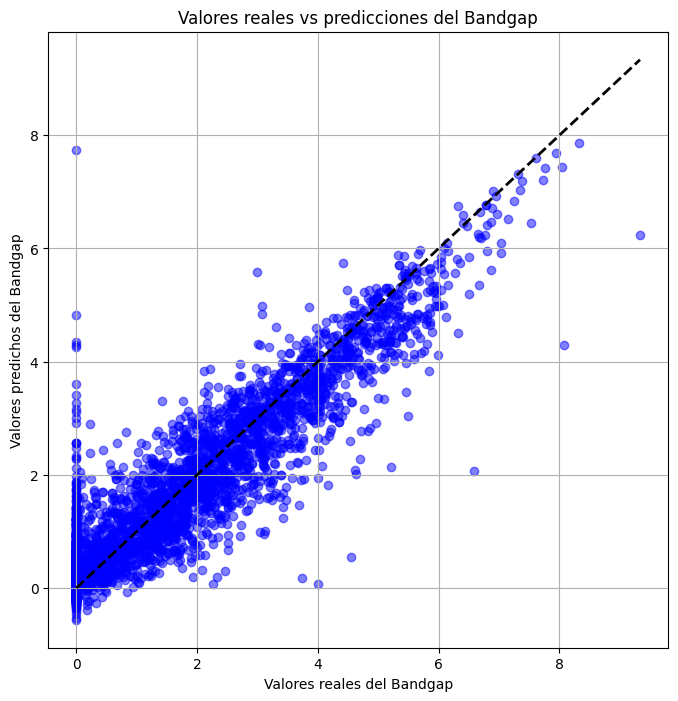

In [ ]:
import matplotlib.pyplot as plt

# Graficar y_test vs y_pred_gb
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_gb, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores reales del Bandgap')
plt.ylabel('Valores predichos del Bandgap')
plt.title('Valores reales vs predicciones del Bandgap')
plt.grid(True)
plt.savefig('bandgap_real_vs_predicho.svg', format='svg', bbox_inches='tight')
plt.show()

In [ ]:
import cairosvg
# Convert SVG to PDF with adjustable DPI
svg_file = 'bandgap_real_vs_predicho.svg'
pdf_file = 'bandgap_real_vs_predicho.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")

Archivo PDF 'bandgap_real_vs_predicho.pdf' creado con éxito.


**Aplicacion de los algoritmos y ensambles con mejor comportamiento para comparacion de predicciones finales**

Stacking (Lasso+Adaboost)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score

lasso_model = Lasso(alpha=0.1)
adaboost_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50, learning_rate=0.1, random_state=42)

# Inicializar StackingRegressor con modelos base
stacking_model = StackingRegressor(
    estimators=[('lasso', lasso_model), ('adaboost', adaboost_model)],
    final_estimator=Lasso(alpha=0.1),
    cv=5
)

# Ajustar el modelo StackingRegressor en el conjunto de entrenamiento
stacking_model.fit(X_train, y_train)

y_pred_stack1 = stacking_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_stack1': y_pred_stack1})
predictions_df.to_csv('y_pred_stack1.csv', index=False)

Stacking (Ridge+Adaboost)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score

# Inicializar modelos base
ridge_model = Ridge(alpha=0.5)
adaboost_model = AdaBoostRegressor(estimator=KNeighborsRegressor(n_neighbors=5), n_estimators=50, learning_rate=0.1, random_state=42)

# Inicializar StackingRegressor con modelos base
stacking_model = StackingRegressor(
    estimators=[('ridge', ridge_model), ('adaboost', adaboost_model)],
    final_estimator=Ridge(alpha=0.5),
    cv=5
)

# Ajustar el modelo StackingRegressor en el conjunto de entrenamiento
stacking_model.fit(X_train, y_train)

y_pred_stack2 = stacking_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_stack2': y_pred_stack2})
predictions_df.to_csv('y_pred_stack2.csv', index=False)


Bagging + EslasticNet

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Inicializar el modelo ElasticNet
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Inicializar el modelo BaggingRegressor con ElasticNet como base
bagging_elasticnet_model = BaggingRegressor(base_estimator=elasticnet_model, n_estimators=100, random_state=42)

# Ajustar el modelo BaggingRegressor en el conjunto de entrenamiento
bagging_elasticnet_model.fit(X_train, y_train)

y_pred_bagging_elasticnet = bagging_elasticnet_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_bagging_elasticnet': y_pred_bagging_elasticnet })
predictions_df.to_csv('y_pred_bagging_elasticnet.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Stacking (Lasso + RF + SVR)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Inicializar modelos base
lasso_model = Lasso(alpha=0.1)
rf_model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
svr_model = SVR(C=1.0, epsilon=0.2)

# Inicializar StackingRegressor con modelos base
stacking_model = StackingRegressor(
    estimators=[('lasso', lasso_model), ('rf', rf_model), ('svr', svr_model)],
    final_estimator=Lasso(alpha=0.1),
    cv=5
)

# Ajustar el modelo StackingRegressor en el conjunto de entrenamiento
stacking_model.fit(X_train, y_train)

# Predicciones
y_pred_stack3 = stacking_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_stack3': y_pred_stack3})
predictions_df.to_csv('y_pred_stack3.csv', index=False)

SVR con parametros de Zhuo et al

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

svr_model = SVR(kernel='rbf', C=10.0, epsilon=0.1, gamma=0.1)

# Entrenamiento
svr_model.fit(X_train, y_train)

# Predicciones
y_pred_svr = svr_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_svr': y_pred_svr})
predictions_df.to_csv('y_pred_svr.csv', index=False)

Voting (RF + SVR)

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


# Inicializar modelos base
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(C=1.0, epsilon=0.2)

# Inicializar VotingRegressor con modelos base
voting_model = VotingRegressor(
    estimators=[('linear', linear_model), ('rf', rf_model), ('svr', svr_model)]
)

# Ajustar el modelo VotingRegressor en el conjunto de entrenamiento
voting_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_voting = voting_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_voting': y_pred_voting})
predictions_df.to_csv('y_pred_voting.csv', index=False)


STACKING 5 (RIDGE + GB +KNN)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Inicializar modelos base
ridge_model = Ridge(alpha=1.0)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Inicializar StackingRegressor con modelos base
stacking_model = StackingRegressor(
    estimators=[('ridge', ridge_model), ('gb', gb_model), ('knn', knn_model)],
    final_estimator=Ridge(alpha=1.0),
    cv=5
)

# Ajustar el modelo StackingRegressor en el conjunto de entrenamiento
stacking_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_stack5 = stacking_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_stack5': y_pred_stack5})
predictions_df.to_csv('y_pred_stack5.csv', index=False)


STACKING 6 (ELASTICNET + GB + SVR)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Inicializar modelos base
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
svr_model = SVR(C=1.0, epsilon=0.2)

# Inicializar StackingRegressor con modelos base
stacking_model = StackingRegressor(
    estimators=[('elasticnet', elasticnet_model), ('gb', gb_model), ('svr', svr_model)],
    final_estimator=ElasticNet(alpha=0.1, l1_ratio=0.5),
    cv=5
)

# Ajustar el modelo StackingRegressor en el conjunto de entrenamiento
stacking_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_stack6= stacking_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_stack6': y_pred_stack6})
predictions_df.to_csv('y_pred_stack6.csv', index=False)

STACKING 7 (RIDGE + GB +DT)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Inicializar modelos base
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
dt_model = DecisionTreeRegressor(max_depth=5)

# Inicializar StackingRegressor con modelos base
stacking_model = StackingRegressor(
    estimators=[('elasticnet', elasticnet_model), ('gb', gb_model), ('dt', dt_model)],
    final_estimator=ElasticNet(alpha=0.1, l1_ratio=0.5),
    cv=5
)

# Ajustar el modelo StackingRegressor en el conjunto de entrenamiento
stacking_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_stack7 = stacking_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_stack7': y_pred_stack7})
predictions_df.to_csv('y_pred_stack7.csv', index=False)


STACKING 8 (Lasso + RF + KNN)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Inicializar modelos base
lasso_model = Lasso(alpha=0.1)
rf_model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)

# Inicializar StackingRegressor con modelos base
stacking_model = StackingRegressor(
    estimators=[('lasso', lasso_model), ('rf', rf_model), ('knn', knn_model)],
    final_estimator=Lasso(alpha=0.1),
    cv=5
)

# Ajustar el modelo StackingRegressor en el conjunto de entrenamiento
stacking_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_stack8 = stacking_model.predict(X_test)

predictions_df = pd.DataFrame({'y_pred_stack8': y_pred_stack8})
predictions_df.to_csv('y_pred_stack8.csv', index=False)

KRR

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import pandas as pd

# Inicializar el modelo KRR con los parámetros del paper
krr_model = KernelRidge(alpha=0.01, kernel='rbf', gamma=0.1)

# Ajustar el modelo KRR en el conjunto de entrenamiento
krr_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_krr = krr_model.predict(X_test)

# Guardar las predicciones en un DataFrame y exportar a un archivo CSV
predictions_df = pd.DataFrame({'y_pred_krr': y_pred_krr})
predictions_df.to_csv('y_pred_krr.csv', index=False)

## Generacion de grafico de comparacion de Modelos de Regresion

**Generamos grafica de comparacion de resultados de MAE promedio de los distintos modelos, para lo cual primero importamos los archivos csv donde se guardaron las predicciones en dataset de test, ya que en algunos casos los modelos aplicados duran varias horas en ejecutarse**

In [ ]:
#GRADIENT BOOSTING
predictions_df = pd.read_csv('y_pred_gb.csv')
y_pred_gb = predictions_df['y_pred_gb'].values

#RANDOM FOREST
predictions_df = pd.read_csv('y_pred_rf.csv')
y_pred_rf = predictions_df['y_pred_rf'].values

#STACKING 1 (LASSO + ADABOOST)
predictions_df = pd.read_csv('y_pred_stack1.csv')
y_pred_stack1 = predictions_df['y_pred_stack1'].values

#STACKING 2 (RIDGE + ADABOOST)
predictions_df = pd.read_csv('y_pred_stack2.csv')
y_pred_stack2 = predictions_df['y_pred_stack2'].values

#ENSAMBLE (BAGGING + ELASTICNET)
predictions_df = pd.read_csv('y_pred_bagging_elasticnet.csv')
y_pred_bagging_elasticnet = predictions_df['y_pred_bagging_elasticnet'].values

#STACKING 3 (Lasso + RF + SVR)
predictions_df = pd.read_csv('y_pred_stack3.csv')
y_pred_stack3 = predictions_df['y_pred_stack3'].values

#SVR (Zhuo)
predictions_df = pd.read_csv('y_pred_svr.csv')
y_pred_svr = predictions_df['y_pred_svr'].values

#VOTING (RF + SVR)
predictions_df = pd.read_csv('y_pred_voting.csv')
y_pred_voting = predictions_df['y_pred_voting'].values

#STACKING 5 (RIDGE + GB +KNN)
predictions_df = pd.read_csv('y_pred_stack5.csv')
y_pred_stack5 = predictions_df['y_pred_stack5'].values


#STACKING 6 (ELASTICNET + GB + SVR)
predictions_df = pd.read_csv('y_pred_stack6.csv')
y_pred_stack6 = predictions_df['y_pred_stack6'].values

#STACKING 7 (RIDGE + GB +DT)
predictions_df = pd.read_csv('y_pred_stack7.csv')
y_pred_stack7 = predictions_df['y_pred_stack7'].values

#STACKING 8 (Lasso + RF + KNN)
predictions_df = pd.read_csv('y_pred_stack8.csv')
y_pred_stack8 = predictions_df['y_pred_stack8'].values

#KRR
predictions_df = pd.read_csv('y_pred_krr.csv')
y_pred_krr = predictions_df['y_pred_krr'].values




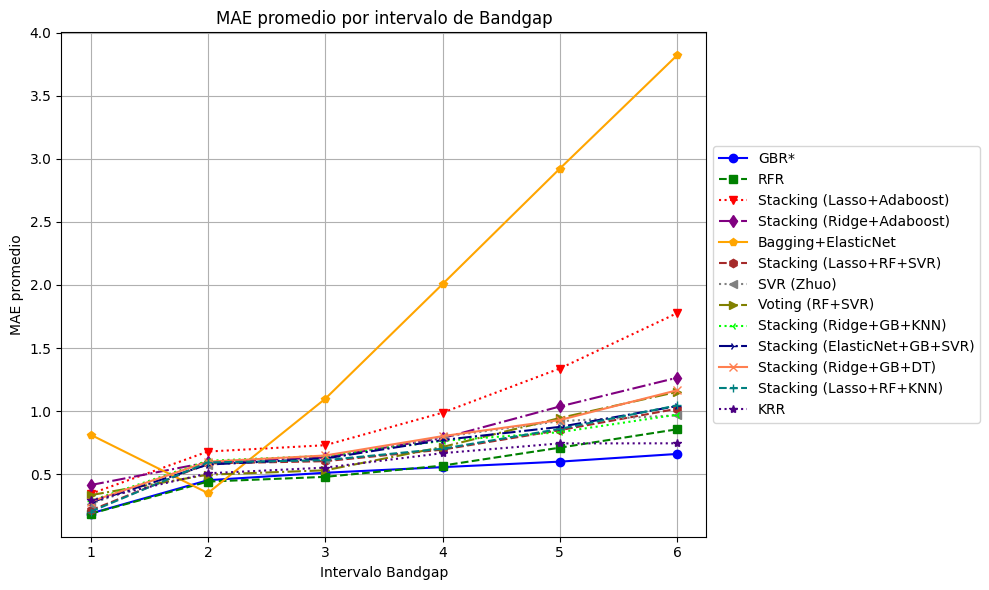

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

df = pd.DataFrame({
    'y_test': y_test,
    'y_pred_gb': y_pred_gb,
    'y_pred_rf': y_pred_rf,
    'y_pred_stack1': y_pred_stack1,
    'y_pred_stack2': y_pred_stack2,
    'y_pred_bagging_elasticnet': y_pred_bagging_elasticnet,
    'y_pred_stack3': y_pred_stack3,
    'y_pred_svr': y_pred_svr,
    'y_pred_voting': y_pred_voting,
    'y_pred_stack5': y_pred_stack5,
    'y_pred_stack6': y_pred_stack6,
    'y_pred_stack7': y_pred_stack7,
    'y_pred_stack8': y_pred_stack8,
    'y_pred_krr': y_pred_krr
})

def determine_group(value):
    return int(value)

df['group'] = df['y_test'].apply(determine_group)

mae_promedio_intervalo_gb = []
mae_promedio_intervalo_rf = []
mae_promedio_intervalo_stack1 = []
mae_promedio_intervalo_stack2 = []
mae_promedio_intervalo_bagging_elasticnet = []
mae_promedio_intervalo_stack3 = []
mae_promedio_intervalo_svr = []
mae_promedio_intervalo_voting = []
mae_promedio_intervalo_stack5 = []
mae_promedio_intervalo_stack6 = []
mae_promedio_intervalo_stack7 = []
mae_promedio_intervalo_stack8 = []
mae_promedio_intervalo_krr = []

for group in range(6):  # Para cada uno de los intervalos de 0 a 5
    group_df = df[(df['group'] >= group) & (df['group'] < group + 1)]


    mae_intervalo_gb = mean_absolute_error(group_df['y_test'], group_df['y_pred_gb'])
    mae_intervalo_rf = mean_absolute_error(group_df['y_test'], group_df['y_pred_rf'])
    mae_intervalo_stack1 = mean_absolute_error(group_df['y_test'], group_df['y_pred_stack1'])
    mae_intervalo_stack2 = mean_absolute_error(group_df['y_test'], group_df['y_pred_stack2'])
    mae_intervalo_bagging_elasticnet = mean_absolute_error(group_df['y_test'], group_df['y_pred_bagging_elasticnet'])
    mae_intervalo_stack3 = mean_absolute_error(group_df['y_test'], group_df['y_pred_stack3'])
    mae_intervalo_svr = mean_absolute_error(group_df['y_test'], group_df['y_pred_svr'])
    mae_intervalo_voting = mean_absolute_error(group_df['y_test'], group_df['y_pred_voting'])
    mae_intervalo_stack5 = mean_absolute_error(group_df['y_test'], group_df['y_pred_stack5'])
    mae_intervalo_stack6 = mean_absolute_error(group_df['y_test'], group_df['y_pred_stack6'])
    mae_intervalo_stack7 = mean_absolute_error(group_df['y_test'], group_df['y_pred_stack7'])
    mae_intervalo_stack8 = mean_absolute_error(group_df['y_test'], group_df['y_pred_stack8'])
    mae_intervalo_krr = mean_absolute_error(group_df['y_test'], group_df['y_pred_krr'])

    mae_promedio_intervalo_gb.append(mae_intervalo_gb)
    mae_promedio_intervalo_rf.append(mae_intervalo_rf)
    mae_promedio_intervalo_stack1.append(mae_intervalo_stack1)
    mae_promedio_intervalo_stack2.append(mae_intervalo_stack2)
    mae_promedio_intervalo_bagging_elasticnet.append(mae_intervalo_bagging_elasticnet)
    mae_promedio_intervalo_stack3.append(mae_intervalo_stack3)
    mae_promedio_intervalo_svr.append(mae_intervalo_svr)
    mae_promedio_intervalo_voting.append(mae_intervalo_voting)
    mae_promedio_intervalo_stack5.append(mae_intervalo_stack5)
    mae_promedio_intervalo_stack6.append(mae_intervalo_stack6)
    mae_promedio_intervalo_stack7.append(mae_intervalo_stack7)
    mae_promedio_intervalo_stack8.append(mae_intervalo_stack8)
    mae_promedio_intervalo_krr.append(mae_intervalo_krr)


intervalos = np.arange(1, 7)
plt.figure(figsize=(10, 6))

plt.plot(intervalos, mae_promedio_intervalo_gb, marker='o', linestyle='-', color='blue', label='GBR*')
plt.plot(intervalos, mae_promedio_intervalo_rf, marker='s', linestyle='--', color='green', label='RFR')
plt.plot(intervalos, mae_promedio_intervalo_stack1, marker='v', linestyle=':', color='red', label='Stacking (Lasso+Adaboost)')
plt.plot(intervalos, mae_promedio_intervalo_stack2, marker='d', linestyle='-.', color='purple', label='Stacking (Ridge+Adaboost)')
plt.plot(intervalos, mae_promedio_intervalo_bagging_elasticnet, marker='p', linestyle='-', color='orange', label='Bagging+ElasticNet')
plt.plot(intervalos, mae_promedio_intervalo_stack3, marker='h', linestyle='--', color='brown', label='Stacking (Lasso+RF+SVR)')
plt.plot(intervalos, mae_promedio_intervalo_svr, marker='<', linestyle=':', color='gray', label='SVR (Zhuo)')
plt.plot(intervalos, mae_promedio_intervalo_voting, marker='>', linestyle='-.', color='olive', label='Voting (RF+SVR)')
plt.plot(intervalos, mae_promedio_intervalo_stack5, marker='3', linestyle=':', color='lime', label='Stacking (Ridge+GB+KNN)')
plt.plot(intervalos, mae_promedio_intervalo_stack6, marker='4', linestyle='-.', color='navy', label='Stacking (ElasticNet+GB+SVR)')
plt.plot(intervalos, mae_promedio_intervalo_stack7, marker='x', linestyle='-', color='coral', label='Stacking (Ridge+GB+DT)')
plt.plot(intervalos, mae_promedio_intervalo_stack8, marker='+', linestyle='--', color='teal', label='Stacking (Lasso+RF+KNN)')
plt.plot(intervalos, mae_promedio_intervalo_krr, marker='*', linestyle=':', color='indigo', label='KRR')

plt.xlabel('Intervalo Bandgap')
plt.ylabel('MAE promedio')
plt.title('MAE promedio por intervalo de Bandgap')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [ ]:
pip install cairosvg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
import cairosvg

# Convert SVG to PDF with adjustable DPI
svg_file = 'MAE_promedio_vs_Bandgap.svg'
pdf_file = 'MAE_promedio_vs_Bandgap.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")

Archivo PDF 'MAE_promedio_vs_Bandgap.pdf' creado con éxito.
